# Term-Frequency (tf) calculation
$$
tf(t,d) = \frac{f_{t,d}}{\sum_{t'\epsilon d}f_{t',d}}
$$

$$
\text{tf}(t, d):  \text{The number appearance word t in document d} \\
\text{}{\sum_{t'\epsilon d}{f_{t',d}}}:  \text{Total word t in document d} \\
$$
# Inverse Documents Frequency (tdf) calculation


$$
itf(t,D) = \log (\frac{N}{|{d \epsilon D : t \epsilon d}|})
$$

$$
\text{}N:  \text{Number d(documents) in D (corpus)} \\
\text{}{|{d \epsilon D : t \epsilon d}|}:  \text{Total appearance of word t in corpus D} \\
$$

# TF-IDF calculation

$$
\text{}TF-IDF = tf(t,d) * itf(t,D)
$$
<body>
<div>
<img title="a title" alt="Alt text" src="Figure_1.png">
</div>
</body>




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
corpus = ["Tôi thích học AI", "AI là trí tuệ nhân tạo",
             "AGI là siêu trí tuệ nhân tạo"]

def plot(matrix):
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar() 
    plt.grid(False)  # Thêm thanh màu
    plt.show()

#### Get Vocabulary (from corpus)

In [10]:

def get_vocab_from_corpus(corpus : list[str]) -> list:
    """
        * Return vocabs from corpus
    """
    vocabs = list()
    for doc in corpus:
        vocabs.extend(doc.split())
        
    unique_vocabs = list(set(vocabs))
    sorted_list = sorted(unique_vocabs)
    return sorted_list

In [11]:
get_vocab_from_corpus(corpus=corpus)

['AGI', 'AI', 'Tôi', 'học', 'là', 'nhân', 'siêu', 'thích', 'trí', 'tuệ', 'tạo']

### Get term frequency (from corpus)

In [12]:
def get_term_frequency(corpus: list[str]) -> np.ndarray:
    """
        * Return term_frequency with Input is Corpus
    """
    vocabs = get_vocab_from_corpus(corpus)
    term_frequency = np.zeros((len(corpus), len(vocabs)))
    for i, doc in enumerate(corpus):
        for word in doc.split():
            term_frequency[i, list(vocabs).index(word)] += 1
    term_frequency /= term_frequency.sum(axis=1, keepdims=True  ) 
    return term_frequency

In [13]:
get_term_frequency(corpus=corpus)

array([[0.        , 0.25      , 0.25      , 0.25      , 0.        ,
        0.        , 0.        , 0.25      , 0.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 0.        , 0.        , 0.16666667,
        0.16666667, 0.        , 0.        , 0.16666667, 0.16666667,
        0.16666667],
       [0.14285714, 0.        , 0.        , 0.        , 0.14285714,
        0.14285714, 0.14285714, 0.        , 0.14285714, 0.14285714,
        0.14285714]])

### Get Invert Document Frequency (from corpus)

In [14]:
def get_inverse_document_frequency(corpus: list[str])-> np.array:
    """
        * Return Inverse Document Frequency from corpus
    """
    vocabs = get_vocab_from_corpus(corpus)
    idf = np.zeros(len(vocabs))
    for i, word in enumerate(vocabs):
        idf[i] = np.log(len(corpus) / (1 + sum([word in doc for doc in corpus])))
    
    return idf

### Get TF-IDF

In [15]:
def get_metrix(corpus: list[str]) -> np.ndarray: 
    return get_term_frequency(corpus) * get_inverse_document_frequency(corpus)

In [16]:
print(f"*************** TF-IDF Matrix \n {get_metrix(corpus)}\n")

*************** TF-IDF Matrix 
 [[0.         0.         0.10136628 0.10136628 0.         0.
  0.         0.10136628 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.05792359 0.         0.         0.         0.         0.
  0.05792359 0.         0.         0.         0.        ]]



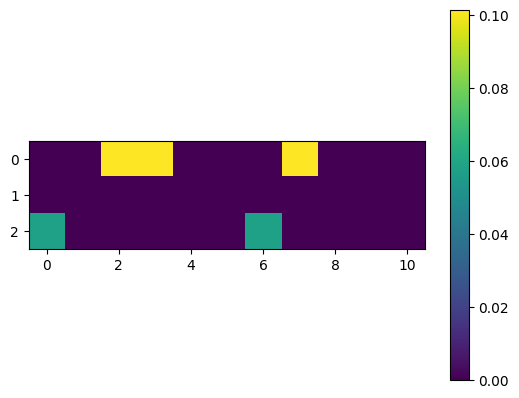

In [17]:
plot(get_metrix(corpus))